In [1]:
from modules.preamble import *

%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
C:\Users\KevinReijnders\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


# Figure in ch3 to explain fuzzy sets

In [2]:
#Defining values
x = [0.001*i for i in range(2200)]
y_t = [1 if x_i >= 1.85 else 0 for x_i in x]
y_f = []
for x_i in x:
    if (x_i<1.8):
        y_f.append(0)
    elif (x_i<2):
        y_f.append(5*(x_i-1.8))
    else:
        y_f.append(1)
        
x = np.array(x)
y_t = np.array(y_t)
y_f = np.array(y_f)

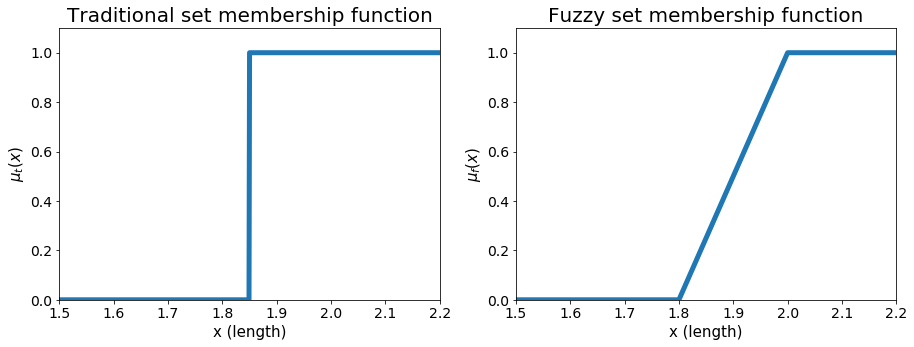

In [3]:
fig, ax = plt.subplots(1,2, figsize=(15,5));

ax[0].plot(x, y_t, linewidth=5);
ax[0].set_title('Traditional set membership function', fontsize=20)
ax[0].set_xlabel('x (length)', fontsize=15)
ax[0].set_ylabel('$\mu_t(x)$', fontsize=15)
for tick in ax[0].xaxis.get_major_ticks():
                tick.label.set_fontsize(14) 
for tick in ax[0].yaxis.get_major_ticks():
                tick.label.set_fontsize(14) 

ax[1].plot(x, y_f, linewidth=5);
ax[1].set_title('Fuzzy set membership function', fontsize=20)
ax[1].set_xlabel('x (length)', fontsize=15)
ax[1].set_ylabel('$\mu_f(x)$', fontsize=15)
for tick in ax[1].xaxis.get_major_ticks():
                tick.label.set_fontsize(14) 
for tick in ax[1].yaxis.get_major_ticks():
                tick.label.set_fontsize(14)

for ax_i in ax:
    ax_i.set_xlim(1.5,2.2)
    ax_i.set_ylim(0,1.1)
    
# plt.savefig(os.path.join(figs_base_path, 'Membership functions.png'),
#             dpi=200)

# Figure in ch3 to explain probabilistic fuzzy systems

In [4]:
from scipy.spatial.distance import euclidean
import matplotlib

cent1 = [2,4]
cent2 = [3.5,1]
offset = 0.5

X = np.array([[cent1[0]-offset,cent1[1]-offset],
              [cent1[0]-offset,cent1[1]+offset],
              [cent1[0]+offset,cent1[1]-offset],
              [cent1[0]+offset,cent1[1]+offset],
              [cent2[0]-offset,cent2[1]-offset],
              [cent2[0]-offset,cent2[1]+offset],
              [cent2[0]+offset,cent2[1]-offset],
              [cent2[0]+offset,cent2[1]+offset]])
y = np.array([0,0,0,0,1,1,1,1])

sigma = euclidean(cent1, cent2)

#Distances to center 1 vs fuzzy membership value
cent_dists = [0.9, 2.2, 3.5]
memb_vals = []
cmap_mf_vals = matplotlib.cm.get_cmap('Greys')
colors = []
for cent_dist in cent_dists:
    memb_val = np.exp(-np.sum(cent_dist**2 / sigma**2))
    memb_vals.append(memb_val)
    colors.append(cmap_mf_vals(memb_val))

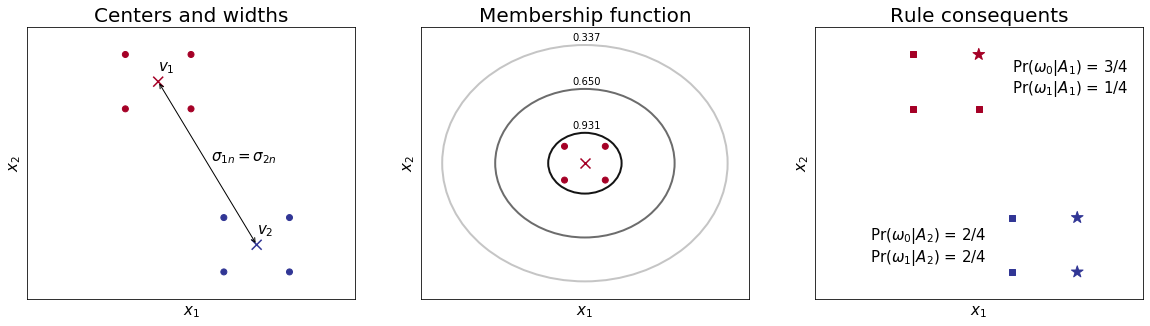

In [5]:
from matplotlib.patches import Ellipse

fig, ax = plt.subplots(nrows=1, ncols=3, sharex=False, sharey=False, figsize=(20,5))

#Plot left
    #Cluster points & centers
ax[0].scatter(X[:,0],X[:,1], c=y, cmap='RdYlBu');
ax[0].scatter(x=[cent1[0], cent2[0]], y=[cent1[1], cent2[1]], c=[0,1], cmap='RdYlBu', marker='x', s=100);

    #Center annotations
ax[0].annotate('$v_1}$', xy=(cent1[0],cent1[1]+.2), size=15);
ax[0].annotate('$v_2}$', xy=(cent2[0], cent2[1]+.2), size=15);

    #Arrows & annotations for sigma
ax[0].annotate(s='', xy=cent1, xytext=cent2, arrowprops=dict(arrowstyle='<->'));
ax[0].annotate('$\sigma_{1n} = \sigma_{2n}$', xy=((cent1[0]+cent2[0])/2+0.05,(cent1[1]+cent2[1])/2+0.05), size=15);

    #x & y ranges
ax[0].set_xlim(0,5)
ax[0].set_ylim(0,5)
    
    #Turn off xticks & yticks
ax[0].set_xticks([],[]);
ax[0].set_yticks([],[]);

#Plot middle
ax[1].scatter(X[:4,0],X[:4,1], c=y[:4], cmap='RdYlBu');
ax[1].scatter([cent1[0]],[cent1[1]], c=[0], marker='x', s=100, cmap='RdYlBu');
ells = []
for i, (cent_dist, memb_val) in enumerate(zip(cent_dists, memb_vals)):
    ell = Ellipse(xy=cent1, width=2*cent_dist, height=2*cent_dist, angle=0, edgecolor=colors[i], lw=2, facecolor='none')
    ax[1].add_artist(ell)
    ax[1].annotate('%.3f'%memb_val, xy=(cent1[0]-0.3, cent1[1]+0.05 + cent_dist + 0.1))
ax[1].set_xlim(cent1[0]-sigma*1.2, cent1[0]+sigma*1.2)
ax[1].set_ylim(cent1[1]-sigma*1.2, cent1[1]+sigma*1.2)

    #Turn off xticks & yticks
ax[1].set_xticks([],[]);
ax[1].set_yticks([],[]);

#Plot right
    #Cluster points with class & cluster number indicators
dead_ind = [0,1,2,4,5]
survive_ind = [3,6,7]
ax[2].scatter(X[survive_ind,0],X[survive_ind,1], c=y[survive_ind], cmap='RdYlBu', marker='*', s=150);
ax[2].scatter(X[dead_ind,0],X[dead_ind,1], c=y[dead_ind], cmap='RdYlBu', marker='s');

    #Calculations for rule consequents
ax[2].annotate('Pr($\omega_0|A_1$) = 3/4', xy=[3, 4.2], size=15);
ax[2].annotate('Pr($\omega_1|A_1$) = 1/4', xy=[3, 3.8], size=15);
ax[2].annotate('Pr($\omega_0|A_2$) = 2/4', xy=[0.85, 1.1], size=15);
ax[2].annotate('Pr($\omega_1|A_2$) = 2/4', xy=[0.85, 0.7], size=15);


    #x & y ranges
ax[2].set_xlim(0,5)
ax[2].set_ylim(0,5)

#Axis labels & titles
plot_names = ['Centers and widths',
              'Membership function',
              'Rule consequents']
for i, name in zip([0,1,2], plot_names):
    ax[i].set_xlabel('$x_1$', fontsize=15);
    ax[i].set_ylabel('$x_2$', fontsize=15);
    ax[i].set_title(name, fontsize=20);

    #Turn off xticks & yticks
ax[2].set_xticks([],[]);
ax[2].set_yticks([],[]);
    
# plt.savefig(os.path.join(figs_base_path, 'Explanation-PFS.png'),
#             dpi=200) #Crop the sides a bit manually afterwards

# Former figure in ch3 to explain the hypothesis space specification issue (not in final version of thesis)

In [6]:
dl_base_xys = np.array([
    [0.5, 6.2],
    [0.5, 4.8],
    [3.5, 4.8],
    [3.5, 6.2],
    [2.5, 6.2],
    [2.5, 5.5],
    [1.5, 5.5],
    [1.5, 6.2],
    [0.5, 6.2],
    [3.5, 6.2]
])

In [7]:
dl_backgr_xys = np.array([
    [0.5, 1.5, 4.8, 6.2],
    [1.5, 2.5, 4.8, 5.5],
    [2.5, 3.5, 4.8, 6.2],
    [1.5, 2.5, 5.5, 6.2],
])

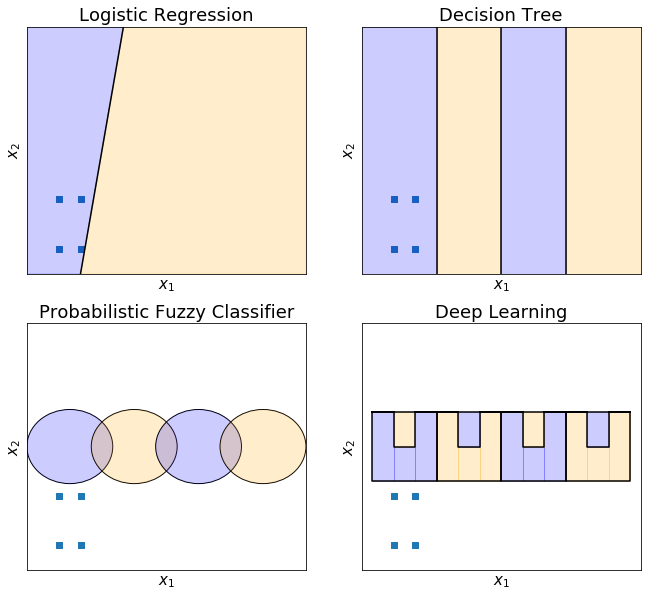

In [8]:
from matplotlib.patches import Ellipse

fig, ax = plt.subplots(2,2, figsize=(11,10));

#Setting plot labels
ax[0,0].set_title('Logistic Regression', fontsize=18)
ax[0,1].set_title('Decision Tree', fontsize=18)
ax[1,0].set_title('Probabilistic Fuzzy Classifier', fontsize=18)
ax[1,1].set_title('Deep Learning', fontsize=18)

#Plotting points
for row in [0,1]:
    for col in [0,1]:
        #Adding points
        ax[row,col].scatter(X[:,0][y==0], X[:,1][y==0], marker='s')
        ax[row,col].scatter(X[:,0][y==1], X[:,1][y==1], marker='v')
        
        #Setting x & y ranges
        ax[row,col].set_xlim(0,13)
        ax[row,col].set_ylim(3,8)
        
        #Removing ticks
        ax[row,col].set_xticks([],[])
        ax[row,col].set_yticks([],[])
        
        #Adding axis labels
        ax[row,col].set_xlabel('$x_1$', fontsize=15)
        ax[row,col].set_ylabel('$x_2$', fontsize=15)
        
#Plotting logistic regression line
ax[0,0].plot(np.array([2.5,4.5]),
             np.array([3,8]),
             '-',
             c='black'
            );
ax[0,0].fill([0,0,4.5,2.5],[3,8,8,3], c='blue', alpha=0.2)
ax[0,0].fill([4.5,2.5,13,13],[8,3,3,8], c='orange', alpha=0.2)

#Plotting decision tree
    #Lines
ax[0,1].axvline(x=3.5, c='black');
ax[0,1].axvline(x=6.5, c='black');
ax[0,1].axvline(x=9.5, c='black');
    #Background coloring
ax[0,1].axvspan(0,3.5,alpha=0.2,color='blue');
ax[0,1].axvspan(3.5,6.5,alpha=0.2,color='orange');
ax[0,1].axvspan(6.5,9.5,alpha=0.2,color='blue');
ax[0,1].axvspan(9.5,13,alpha=0.2,color='orange');

#Plotting PFS - should be fading towards outer edges, but very difficult to get... Explain in thesis how it should be

    #Coloring: background of the gaussians
for x_center in [2,5,8,11]: 
    if ( (x_center==2) | (x_center==8) ):
        c = 'blue'
    else:
        c = 'orange'
    ell1 = Ellipse(xy=[x_center,5.5], width=4, height=1.5, angle=0, edgecolor='black', facecolor='none')
    ell2 = Ellipse(xy=[x_center,5.5], width=4, height=1.5, angle=0, edgecolor='none', facecolor=c, alpha=0.2)
    ax[1,0].add_artist(ell1)
    ax[1,0].add_artist(ell2)

#Plotting DL - explain in thesis how it could potentially predict both classes outside the boundaries

for x_offset in [0,3,6,9]:
    #Set background colors correctly
    if ((x_offset==0) | (x_offset==6)):
        c_small = 'orange'
        c_big = 'blue'
    else:
        c_small = 'blue'
        c_big = 'orange'
    
    #Plot boxes & backgrounds
    ax[1,1].plot(dl_base_xys[:,0]+x_offset, dl_base_xys[:,1], color='black');
    for box_nr in [0,1,2,3]:
        if (box_nr == 3):
            ax[1,1].axvspan(dl_backgr_xys[box_nr][0]+x_offset,
                            dl_backgr_xys[box_nr][1]+x_offset,
                            (dl_backgr_xys[box_nr][2]-3)/(8-3),
                            (dl_backgr_xys[box_nr][3]-3)/(8-3),
                            color=c_small,
                            alpha=0.2)
        else:
            ax[1,1].axvspan(dl_backgr_xys[box_nr][0]+x_offset,
                            dl_backgr_xys[box_nr][1]+x_offset,
                            (dl_backgr_xys[box_nr][2]-3)/(8-3),
                            (dl_backgr_xys[box_nr][3]-3)/(8-3),
                            color=c_big,
                            alpha=0.2)

# Figure in ch4 to explain misaligned, unevenly sampled time series

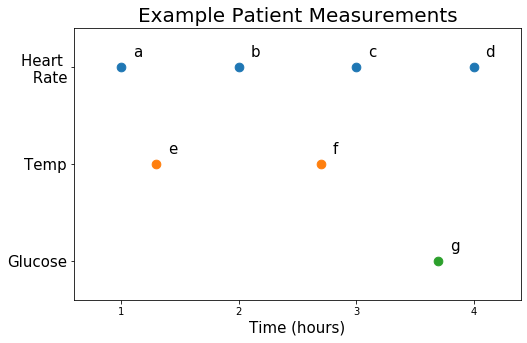

In [9]:
#Generating coordinates for points
heart_rate_coord = np.array([[i, 3] for i in range(1,5)])
temp_coord = np.array([[i, 2] for i in [1.3, 2.7]])
gluc_coord = np.array([[3.7,1]])

#Creating figure & plotting points
fig, ax = plt.subplots(1,1, figsize=(8,5));
plt.scatter(heart_rate_coord[:,0], heart_rate_coord[:,1], s=75);
plt.scatter(temp_coord[:,0], temp_coord[:,1], s=75);
plt.scatter(gluc_coord[:,0], gluc_coord[:,1], s=75);

#Labels for the point to create the table for further explanation
all_coords = np.vstack((heart_rate_coord, temp_coord, gluc_coord))
all_texts = ['a', 'b', 'c', 'd', 'e', 'f', 'g']
for (x, y), text in zip(all_coords, all_texts):
    plt.text(x+0.1,y+0.1,text,size=15)

#Plot settings
ax.set_xlim(0.6,4.4);
ax.set_ylim(0.6,3.4);
ax.set_title('Example Patient Measurements', size=20);
ax.set_xlabel('Time (hours)', size=15);
ax.set_yticks([1,2,3]);
ax.set_xticks([1,2,3,4])
ax.set_yticklabels(['Glucose', 'Temp', 'Heart \n Rate'], size=15);

# plt.savefig(os.path.join(figs_base_path, 'Example-Patient-Measurements.png'),
#             dpi=200, 
#             pad_inches=100)

# ROC & PR curves

Adapted from https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/

In [10]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, precision_recall_curve, roc_auc_score, auc

Model 1: ROC AUC=0.733 , PR AUC=0.225
Model 2: ROC AUC=0.704 , PR AUC=0.115
------------
Model 1: 46.554930616731795 % better AUC than baseline
Model 2: 40.774434731539834 % better AUC than baseline
------------
Model 1: 2153.832221031189 % better PR AUC than baseline
Model 2: 1052.5256931781769 % better PR AUC than baseline


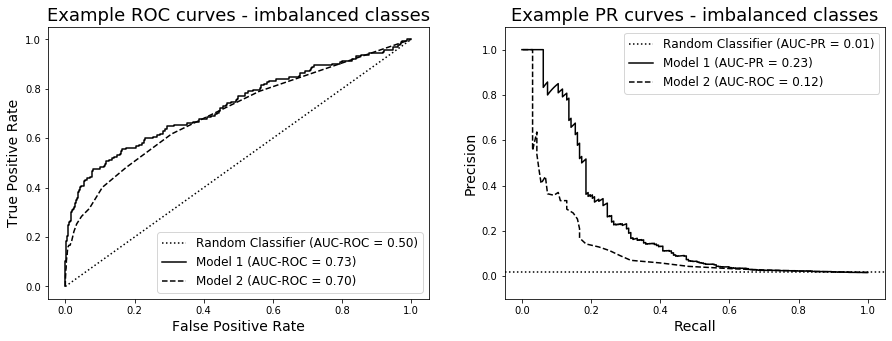

In [11]:
#Subplots
fig, axes = plt.subplots(1,2, figsize=(15,5))
pos_frac = .01

# generate 2 class dataset
X, y = make_classification(n_samples=20000, n_features=40, n_informative=25, n_classes=2, random_state=100,
                          weights=[1-pos_frac,pos_frac])
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(testy))]

#---MODEL 1
# fit a model
model = LogisticRegression(solver='lbfgs', random_state=101)
model.fit(trainX, trainy)
# predict probabilities
lr_probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(testy, ns_probs)
lr_auc1 = roc_auc_score(testy, lr_probs)
# summarize scores
# print('No Skill: ROC AUC=%.3f' % (ns_auc))

# calculate roc + pr curves 
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)
lr_precision, lr_recall, _ = precision_recall_curve(testy, lr_probs)
m = tf.keras.metrics.AUC(num_thresholds=len(lr_precision), curve='PR')
m.update_state(testy, lr_probs) #Correct PR with correct interpolation
lr_prauc1 = m.result().numpy()
# lr_prauc1 = auc(lr_recall, lr_precision)

# plot the roc + pr curves for the model
axes[0].plot(ns_fpr, ns_tpr, linestyle='dotted', color = 'black', label='Random Classifier (AUC-ROC = %.2f)' % ns_auc)
axes[0].plot(lr_fpr, lr_tpr, linestyle='-', color= 'black', label='Model 1 (AUC-ROC = %.2f)' % lr_auc1)

axes[1].axhline(testy.sum() / len(testy), linestyle='dotted', color = 'black', label='Random Classifier (AUC-PR = ' + str(pos_frac) + ")")
axes[1].plot(lr_recall, lr_precision, linestyle='-', color= 'black', label='Model 1 (AUC-PR = %.2f)' % lr_prauc1)


#---MODEL 2
# fit a model
model = RandomForestClassifier(n_jobs=-1, random_state=101)
model.fit(trainX, trainy)
# predict probabilities
lr_probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
lr_auc2 = roc_auc_score(testy, lr_probs)
# summarize scores
# print('No Skill: ROC AUC=%.3f' % (ns_auc))

# calculate roc curves + pr curves for the model
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)
lr_precision, lr_recall, _ = precision_recall_curve(testy, lr_probs)
m = tf.keras.metrics.AUC(num_thresholds=len(lr_precision), curve='PR')
m.update_state(testy, lr_probs) #Correct PR with correct interpolation
lr_prauc2 = m.result().numpy()
# lr_prauc2 = auc(lr_recall, lr_precision)

# plot the roc curve for the model

axes[0].plot(lr_fpr, lr_tpr, linestyle='--', color= 'black', label='Model 2 (AUC-ROC = %.2f)' % lr_auc2)
axes[1].plot(lr_recall, lr_precision, linestyle='--', color= 'black', label='Model 2 (AUC-ROC = %.2f)' % lr_prauc2)

# axis labels
axes[0].set_xlabel('False Positive Rate', fontsize=14);
axes[0].set_ylabel('True Positive Rate', fontsize=14);
axes[0].legend(fontsize=12);
axes[0].set_title('Example ROC curves - imbalanced classes', fontsize=18);

axes[1].set_xlabel('Recall', fontsize=14);
axes[1].set_ylabel('Precision', fontsize=14);
axes[1].legend(fontsize=12);
axes[1].set_title('Example PR curves - imbalanced classes', fontsize=18);
axes[1].set_ylim(-0.1, 1.1);

#Print the resulting values
print('Model 1: ROC AUC=%.3f' % (lr_auc1), ', PR AUC=%.3f' % (lr_prauc1))
print('Model 2: ROC AUC=%.3f' % (lr_auc2), ', PR AUC=%.3f' % (lr_prauc2))
print('------------')
print('Model 1:', (lr_auc1-0.5)/0.5*100, '% better AUC than baseline');
print('Model 2:', (lr_auc2-0.5)/0.5*100, '% better AUC than baseline');
print('------------')
print('Model 1:', (lr_prauc1-pos_frac)/pos_frac*100, '% better PR AUC than baseline');
print('Model 2:', (lr_prauc2-pos_frac)/pos_frac*100, '% better PR AUC than baseline');

In [12]:
# Modify testx testy to contain roughly equal amount of positives as negatives
num_pos_reps = int(0.5/pos_frac) + 9 #Trial-and-error hack to achieve 50-50 class distribution
testX_pos_rep = np.array([testX[testy==1] for x in range(num_pos_reps)]).reshape(-1,40)
testy_pos_rep = np.array([testy[testy==1] for x in range(num_pos_reps)]).reshape(-1,)
testX = np.vstack((testX, testX_pos_rep))
testy = np.hstack((testy, testy_pos_rep))
new_pos_frac = testy.sum() / len(testy)

Model 1: ROC AUC=0.733 , PR AUC=0.782
Model 2: ROC AUC=0.704 , PR AUC=0.710
------------
Model 1: 46.554930616731795 % better AUC than baseline
Model 2: 40.774434731539834 % better AUC than baseline
------------
Model 1: 57.25786980778101 % better PR AUC than baseline
Model 2: 42.879715885645076 % better PR AUC than baseline


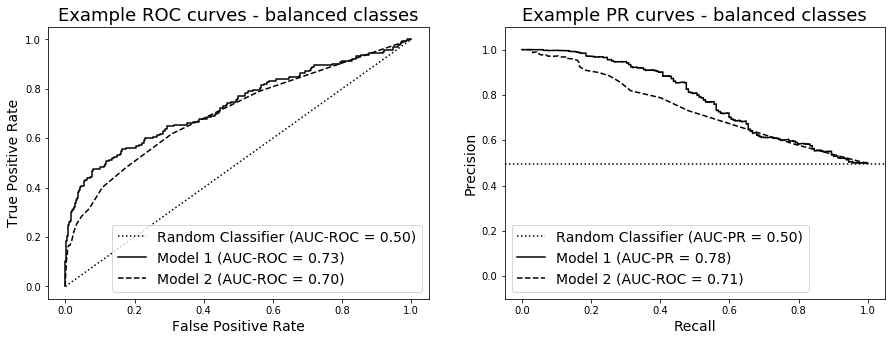

In [13]:
#Subplots
fig, axes = plt.subplots(1,2, figsize=(15,5))

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(testy))]

#---MODEL 1
# # fit a model
model = LogisticRegression(solver='lbfgs', random_state=101)
model.fit(trainX, trainy)
# predict probabilities
lr_probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(testy, ns_probs)
lr_auc1 = roc_auc_score(testy, lr_probs)
# summarize scores
# print('No Skill: ROC AUC=%.3f' % (ns_auc))

# calculate roc + pr curves 
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)
lr_precision, lr_recall, _ = precision_recall_curve(testy, lr_probs)
m = tf.keras.metrics.AUC(num_thresholds=len(lr_precision), curve='PR')
m.update_state(testy, lr_probs) #Correct PR with correct interpolation
lr_prauc1 = m.result().numpy()
# lr_prauc1 = auc(lr_recall, lr_precision)

# plot the roc + pr curves for the model
axes[0].plot(ns_fpr, ns_tpr, linestyle='dotted', color = 'black', label='Random Classifier (AUC-ROC = %.2f)' % ns_auc)
axes[0].plot(lr_fpr, lr_tpr, linestyle='-', color= 'black', label='Model 1 (AUC-ROC = %.2f)' % lr_auc1)

axes[1].axhline(testy.sum() / len(testy), linestyle='dotted', color = 'black', label='Random Classifier (AUC-PR = %.2f)' % new_pos_frac)
axes[1].plot(lr_recall, lr_precision, linestyle='-', color= 'black', label='Model 1 (AUC-PR = %.2f)' % lr_prauc1)


#---MODEL 2
# fit a model
model = RandomForestClassifier(n_jobs=-1, random_state=101)
model.fit(trainX, trainy)
# predict probabilities
lr_probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
lr_auc2 = roc_auc_score(testy, lr_probs)
# summarize scores
# print('No Skill: ROC AUC=%.3f' % (ns_auc))

# calculate roc curves + pr curves for the model
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)
lr_precision, lr_recall, _ = precision_recall_curve(testy, lr_probs)
m = tf.keras.metrics.AUC(num_thresholds=len(lr_precision), curve='PR')
m.update_state(testy, lr_probs) #Correct PR with correct interpolation
lr_prauc2 = m.result().numpy()

# plot the roc curve for the model

axes[0].plot(lr_fpr, lr_tpr, linestyle='--', color= 'black', label='Model 2 (AUC-ROC = %.2f)' % lr_auc2)
axes[1].plot(lr_recall, lr_precision, linestyle='--', color= 'black', label='Model 2 (AUC-ROC = %.2f)' % lr_prauc2)

# axis labels
axes[0].set_xlabel('False Positive Rate', fontsize=14);
axes[0].set_ylabel('True Positive Rate', fontsize=14);
axes[0].legend(fontsize=14);
axes[0].set_title('Example ROC curves - balanced classes', fontsize=18);

axes[1].set_xlabel('Recall', fontsize=14);
axes[1].set_ylabel('Precision', fontsize=14);
axes[1].legend(fontsize=14);
axes[1].set_title('Example PR curves - balanced classes', fontsize=18);
axes[1].set_ylim(-0.1, 1.1);

#Print the resulting values
print('Model 1: ROC AUC=%.3f' % (lr_auc1), ', PR AUC=%.3f' % (lr_prauc1))
print('Model 2: ROC AUC=%.3f' % (lr_auc2), ', PR AUC=%.3f' % (lr_prauc2))
print('------------')
print('Model 1:', (lr_auc1-0.5)/0.5*100, '% better AUC than baseline');
print('Model 2:', (lr_auc2-0.5)/0.5*100, '% better AUC than baseline');
print('------------')

print('Model 1:', (lr_prauc1-new_pos_frac)/new_pos_frac*100, '% better PR AUC than baseline');
print('Model 2:', (lr_prauc2-new_pos_frac)/new_pos_frac*100, '% better PR AUC than baseline');

**Merge both figures manually into a single figure in "Figure Merging.pptx"**

Notes:
* "better than baseline" is a conditional statement (better than the baseline on this particular metric), which is why both differ. AUC is optimistic when the class imbalance is severe!
* "an introduction to ROC analysis" by Fawcett gives a nice interpretation of class imbalance issue and of the diagonal in ROC curves, and also shows that roc curve should remain the same when class balance differs.
* Explanation of why ROC curve insensitive to class distribution: https://www.quora.com/Why-is-AUC-Area-under-ROC-insensitive-to-class-distribution-changes . Bottom line is that both denominator & nominators of TPR and FPR change equally when class distribution changes, resulting in no change on these metrics and hence no change in any point of the ROC curve.

# Kappa curve

In [14]:
from modules.kappa import *

Optimal AUK of model 1 at threshold 0.12
Optimal AUK of model 2 at threshold 0.12
Optimal AUK of model 1 at threshold 0.03
Optimal AUK of model 2 at threshold 0.02


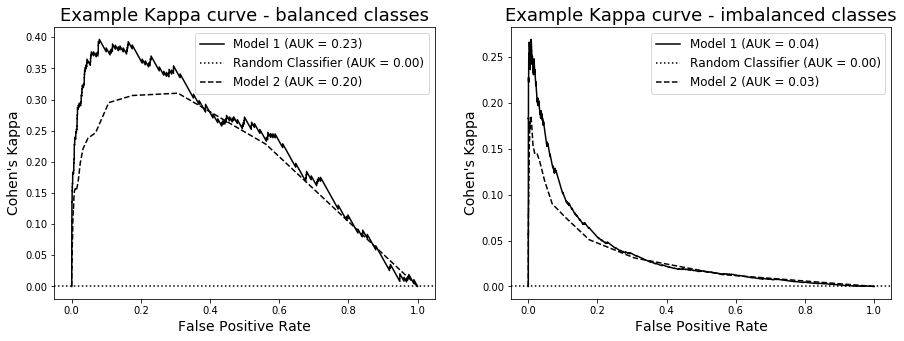

In [16]:
#Subplots
fig, axes = plt.subplots(1,2, figsize=(15,5))
pos_frac = .01

# generate 2 class dataset
X, y = make_classification(n_samples=20000, n_features=40, n_informative=25, n_classes=2, random_state=100,
                          weights=[1-pos_frac,pos_frac])
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)

#---MODEL 1
# fit a model
model = LogisticRegression(solver='lbfgs', random_state=101)
model.fit(trainX, trainy)
# predict probabilities
lr_probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate score
lr_auk1 = auk_score(testy, lr_probs)
# summarize scores
# print('No Skill: ROC AUC=%.3f' % (ns_auc))

# calculate kappa curve
lr_fpr, lr_kappa, thresholds = kappa_curve(testy, lr_probs)

#Calculate best threshold
bt1 = thresholds[np.argmax(lr_kappa)]

# plot the kappa curve for the model
axes[1].plot(lr_fpr, lr_kappa, linestyle='-', color= 'black', label='Model 1 (AUK = %.2f)' % lr_auk1)
axes[1].axhline(0, linestyle='dotted', color = 'black', label='Random Classifier (AUK = 0.00)')

#---MODEL 2
# fit a model
model = RandomForestClassifier(n_jobs=-1, random_state=101)
model.fit(trainX, trainy)
# predict probabilities
lr_probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
lr_kappa2 = auk_score(testy, lr_probs)
# summarize scores
# print('No Skill: ROC AUC=%.3f' % (ns_auc))

# calculate auk curve for the model
lr_fpr, lr_kappa, thresholds = kappa_curve(testy, lr_probs)

#Calculate best threshold
bt2 = thresholds[np.argmax(lr_kappa)]

# plot the auk curve for the model
axes[1].plot(lr_fpr, lr_kappa, linestyle='--', color= 'black', label='Model 2 (AUK = %.2f)' % lr_kappa2)

# axes[1]is labels
axes[1].set_xlabel('False Positive Rate', fontsize=14);
axes[1].set_ylabel("Cohen's Kappa", fontsize=14);
axes[1].legend(fontsize=12);

print("Optimal AUK of model 1 at threshold %.2f" % bt1)
print("Optimal AUK of model 2 at threshold %.2f" % bt2)

# #Print the resulting values
# print('Model 1: ROC AUC=%.3f' % (lr_auc1), ', PR AUC=%.3f' % (lr_prauc1))
# print('Model 2: ROC AUC=%.3f' % (lr_auc2), ', PR AUC=%.3f' % (lr_prauc2))
# print('------------')
# print('Model 1:', (lr_auc1-0.5)/0.5*100, '% better AUC than baseline');
# print('Model 2:', (lr_auc2-0.5)/0.5*100, '% better AUC than baseline');
# print('------------')
# print('Model 1:', (lr_prauc1-pos_frac)/pos_frac*100, '% better PR AUC than baseline');
# print('Model 2:', (lr_prauc2-pos_frac)/pos_frac*100, '% better PR AUC than baseline');






# Modify testx testy to contain roughly equal amount of positives as negatives
num_pos_reps = int(0.5/pos_frac) + 9 #Trial-and-error hack to achieve 50-50 class distribution
testX_pos_rep = np.array([testX[testy==1] for x in range(num_pos_reps)]).reshape(-1,40)
testy_pos_rep = np.array([testy[testy==1] for x in range(num_pos_reps)]).reshape(-1,)
testX = np.vstack((testX, testX_pos_rep))
testy = np.hstack((testy, testy_pos_rep))
new_pos_frac = testy.sum() / len(testy)

#New curve
#---MODEL 1
# fit a model
model = LogisticRegression(solver='lbfgs', random_state=101)
model.fit(trainX, trainy)
# predict probabilities
lr_probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate score
lr_auk1 = auk_score(testy, lr_probs)
# summarize scores
# print('No Skill: ROC AUC=%.3f' % (ns_auc))

# calculate kappa curve
lr_fpr, lr_kappa, thresholds = kappa_curve(testy, lr_probs)

#Calculate best threshold
bt1 = thresholds[np.argmax(lr_kappa)]

# plot the kappa curve for the model
axes[0].plot(lr_fpr, lr_kappa, linestyle='-', color= 'black', label='Model 1 (AUK = %.2f)' % lr_auk1)
axes[0].axhline(0, linestyle='dotted', color = 'black', label='Random Classifier (AUK = 0.00)')

#---MODEL 2
# fit a model
model = RandomForestClassifier(n_jobs=-1, random_state=101)
model.fit(trainX, trainy)
# predict probabilities
lr_probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
lr_kappa2 = auk_score(testy, lr_probs)
# summarize scores
# print('No Skill: ROC AUC=%.3f' % (ns_auc))

# calculate auk curve for the model
lr_fpr, lr_kappa, thresholds = kappa_curve(testy, lr_probs)

#Calculate best threshold
bt2 = thresholds[np.argmax(lr_kappa)]

# plot the auk curve for the model
axes[0].plot(lr_fpr, lr_kappa, linestyle='--', color= 'black', label='Model 2 (AUK = %.2f)' % lr_kappa2)

# axis labels
axes[0].set_xlabel('False Positive Rate', fontsize=14);
axes[0].set_ylabel("Cohen's Kappa", fontsize=14);
axes[0].legend(fontsize=12);

#Plot names
axes[0].set_title("Example Kappa curve - balanced classes", fontsize=18)
axes[1].set_title("Example Kappa curve - imbalanced classes", fontsize=18)

print("Optimal AUK of model 1 at threshold %.2f" % bt1)
print("Optimal AUK of model 2 at threshold %.2f" % bt2)